In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For default view 
pd.set_option("display.max_columns", 75)

In [2]:
#Loading the data set
df = pd.read_csv('electricity_bill_dataset.csv')
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8           3806.4  
2         7.7           3203.2  
3         9.2           4370.0  
4         9.2           4204.4

In [3]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [5]:
# Data preparation
## Data Cleaning
# Checking missing values
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [6]:
# Checking duplicates
df.duplicated().sum()

0

In [7]:
# Converting electricitybill data type to float for uniformity
df['ElectricityBill'] = df['ElectricityBill'].astype(float)
df['ElectricityBill']

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [8]:
# Feature Engineering
# Method to categorize seasons
def categorize_seasons(Month):
    if Month in [3, 4, 5]:
        return "Summer"
    elif Month in [6, 7, 8, 9]:
        return  "Monsoon"
    else:
        return  "Winter"

    
df['season'] = df['Month'].apply(categorize_seasons)

df.head()


Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  
0         8.4           3225.6   Winter  
1         7.8           3806.4   Summer  
2         7.7           3203.2  Monsoon  
3         9.2           4370.0  Monsoon  
4         9.2           4204.4   Winter

In [9]:
# MonthlyCostPerHour
df['MonthlyCostPerHour'] = df['ElectricityBill'] / df['MonthlyHours']
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  
0         8.4           3225.6   Winter                 8.4  
1         7.8           3806.4   Summer                 7.8  
2         7.7           3203.2  Monsoon                 7.7  
3         9.2           4370.0  Monsoon                 9.2  
4         9.2           4204.4   Winter                 9.2

In [10]:
# Tariff Efficiency
df['TariffEfficiency'] = df['ElectricityBill'] / df['TariffRate']
df.head()


Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  
0         8.4           3225.6   Winter                 8.4             384.0  
1         7.8           3806.4   Summer                 7.8             488.0  
2         7.7           3203.2  Monsoon                 7.7             416.0  
3         9.2           4370.0  Monsoon                 9.2             475.0  
4         9.2           4204.4   Winter                 9.2             457.0

In [11]:
# Total Appliance Usage
df['TotalApplianceHours'] = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']].sum(axis=1)
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  \
0         8.4           3225.6   Winter                 8.4             384.0   
1         7.8           3806.4   Summer                 7.8             488.0   
2         7.7           3203.2  Monsoon                 7.7             416.0   
3         9.2           4370.0  Monsoon                 9.2             475.0   
4         9.2           4204.4   Winter                 9.2             457.0   

   TotalApplianceHours  
0                 48.0  
1                 47.0  
2                 42.0  
3                 54.0  
4                 48.0

In [12]:
# Percentage Contribution of Each Appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
for appliance in appliances:
    df[f'{appliance}_Contribution'] = (df[appliance] / df['TotalApplianceHours']) * 100
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  \
0         8.4           3225.6   Winter                 8.4             384.0   
1         7.8           3806.4   Summer                 7.8             488.0   
2         7.7           3203.2  Monsoon                 7.7             416.0   
3         9.2           4370.0  Monsoon                 9.2             475.0   
4         9.2           4204.4   Winter                 9.2             457.0   

   TotalApplianceHours  Fan_Contribution  Refrigerator_Contribution  \
0                 48.0         33.333333                  47.916667   
1                 47.0         40.425532                  46.808511   
2                 42.0         16.666667                  47.619048   
3                 54.0         12.962963                  40.740741   
4                 48.0         22.916667                  47.916667   

   AirConditioner_Contribution  Television_Contribution  Monitor_Contribution  \
0                     4.166667                12.500000              2.083333   
1                     4.255319                 6.382979              2.127660   
2                     4.761905                14.285714             16.666667   
3                     5.555556                38.888889              1.851852   
4                     4.166667                22.916667              2.083333   

   MotorPump_Contribution  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [13]:
# Usage Category
def categorize_usage(bill):
    if bill < 2500:
        return 'Low'
    elif  2501 <= bill <= 5000 :
        return 'Medium'
    else:
        return 'High'

df['UsageCategory'] = df['ElectricityBill'].apply(categorize_usage)
df.head(15)

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0    16          23.0             2.0         6.0      1.0          0     10   
1    19          22.0             2.0         3.0      1.0          0      5   
2     7          20.0             2.0         6.0      7.0          0      7   
3     7          22.0             3.0        21.0      1.0          0      6   
4    11          23.0             2.0        11.0      1.0          0      2   
5    13          22.0             0.0        18.0      1.0          0      6   
6    23          22.0             3.0        20.0     12.0          0      5   
7    22          23.0             0.0        21.0      1.0          0     12   
8     8          20.0             2.0         8.0      1.0          0      8   
9    10          23.0             0.0        18.0      7.0          0      1   
10   16          22.0             3.0        14.0      1.0          0      6   
11    5          19.0             2.0        20.0      1.0          0     12   
12   10          23.0             1.0        22.0      1.0          0      9   
13   11          22.0             3.0        19.0      1.0          0     11   
14   18          22.0             1.0         3.0     12.0          0      7   

         City                                    Company  MonthlyHours  \
0   Hyderabad                    Tata Power Company Ltd.           384   
1    Vadodara                                       NHPC           488   
2      Shimla                            Jyoti Structure           416   
3      Mumbai                            Power Grid Corp           475   
4      Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   
5   Ratnagiri                           Adani Power Ltd.           471   
6   New Delhi                            Kalpataru Power           755   
7   New Delhi                           Adani Power Ltd.           492   
8   New Delhi                               Orient Green           546   
9       Dahej            Sterlite Power Transmission Ltd           578   
10  Ahmedabad         Neueon Towers / Sujana Towers Ltd.           450   
11     Mumbai            Sterlite Power Transmission Ltd           493   
12  Hyderabad                          KEC International           492   
13  Ahmedabad                            Indowind Energy           565   
14      Noida            Unitech Power Transmission Ltd.           414   

    TariffRate  ElectricityBill   season  MonthlyCostPerHour  \
0          8.4           3225.6   Winter                 8.4   
1          7.8           3806.4   Summer                 7.8   
2          7.7           3203.2  Monsoon                 7.7   
3          9.2           4370.0  Monsoon                 9.2   
4          9.2           4204.4   Winter                 9.2   
5          7.4           3485.4  Monsoon                 7.4   
6          8.5           6417.5   Summer                 8.5   
7          8.5           4182.0   Winter                 8.5   
8          8.5           4641.0  Monsoon                 8.5   
9          7.6           4392.8   Winter                 7.6   
10         7.9           3555.0  Monsoon                 7.9   
11         9.2           4535.6   Winter                 9.2   
12         8.4           4132.8  Monsoon                 8.4   
13         7.9           4463.5   Winter                 7.9   
14         8.2           3394.8  Monsoon                 8.2   

    TariffEfficiency  TotalApplianceHours  Fan_Contribution  \
0              384.0                 48.0         33.333333   
1              488.0                 47.0         40.425532   
2              416.0                 42.0         16.666667   
3              475.0                 54.0         12.962963   
4              457.0                 48.0         22.916667   
5              471.0                 54.0         24.074074   
6              755.0                 80.0         28.750000   
7        

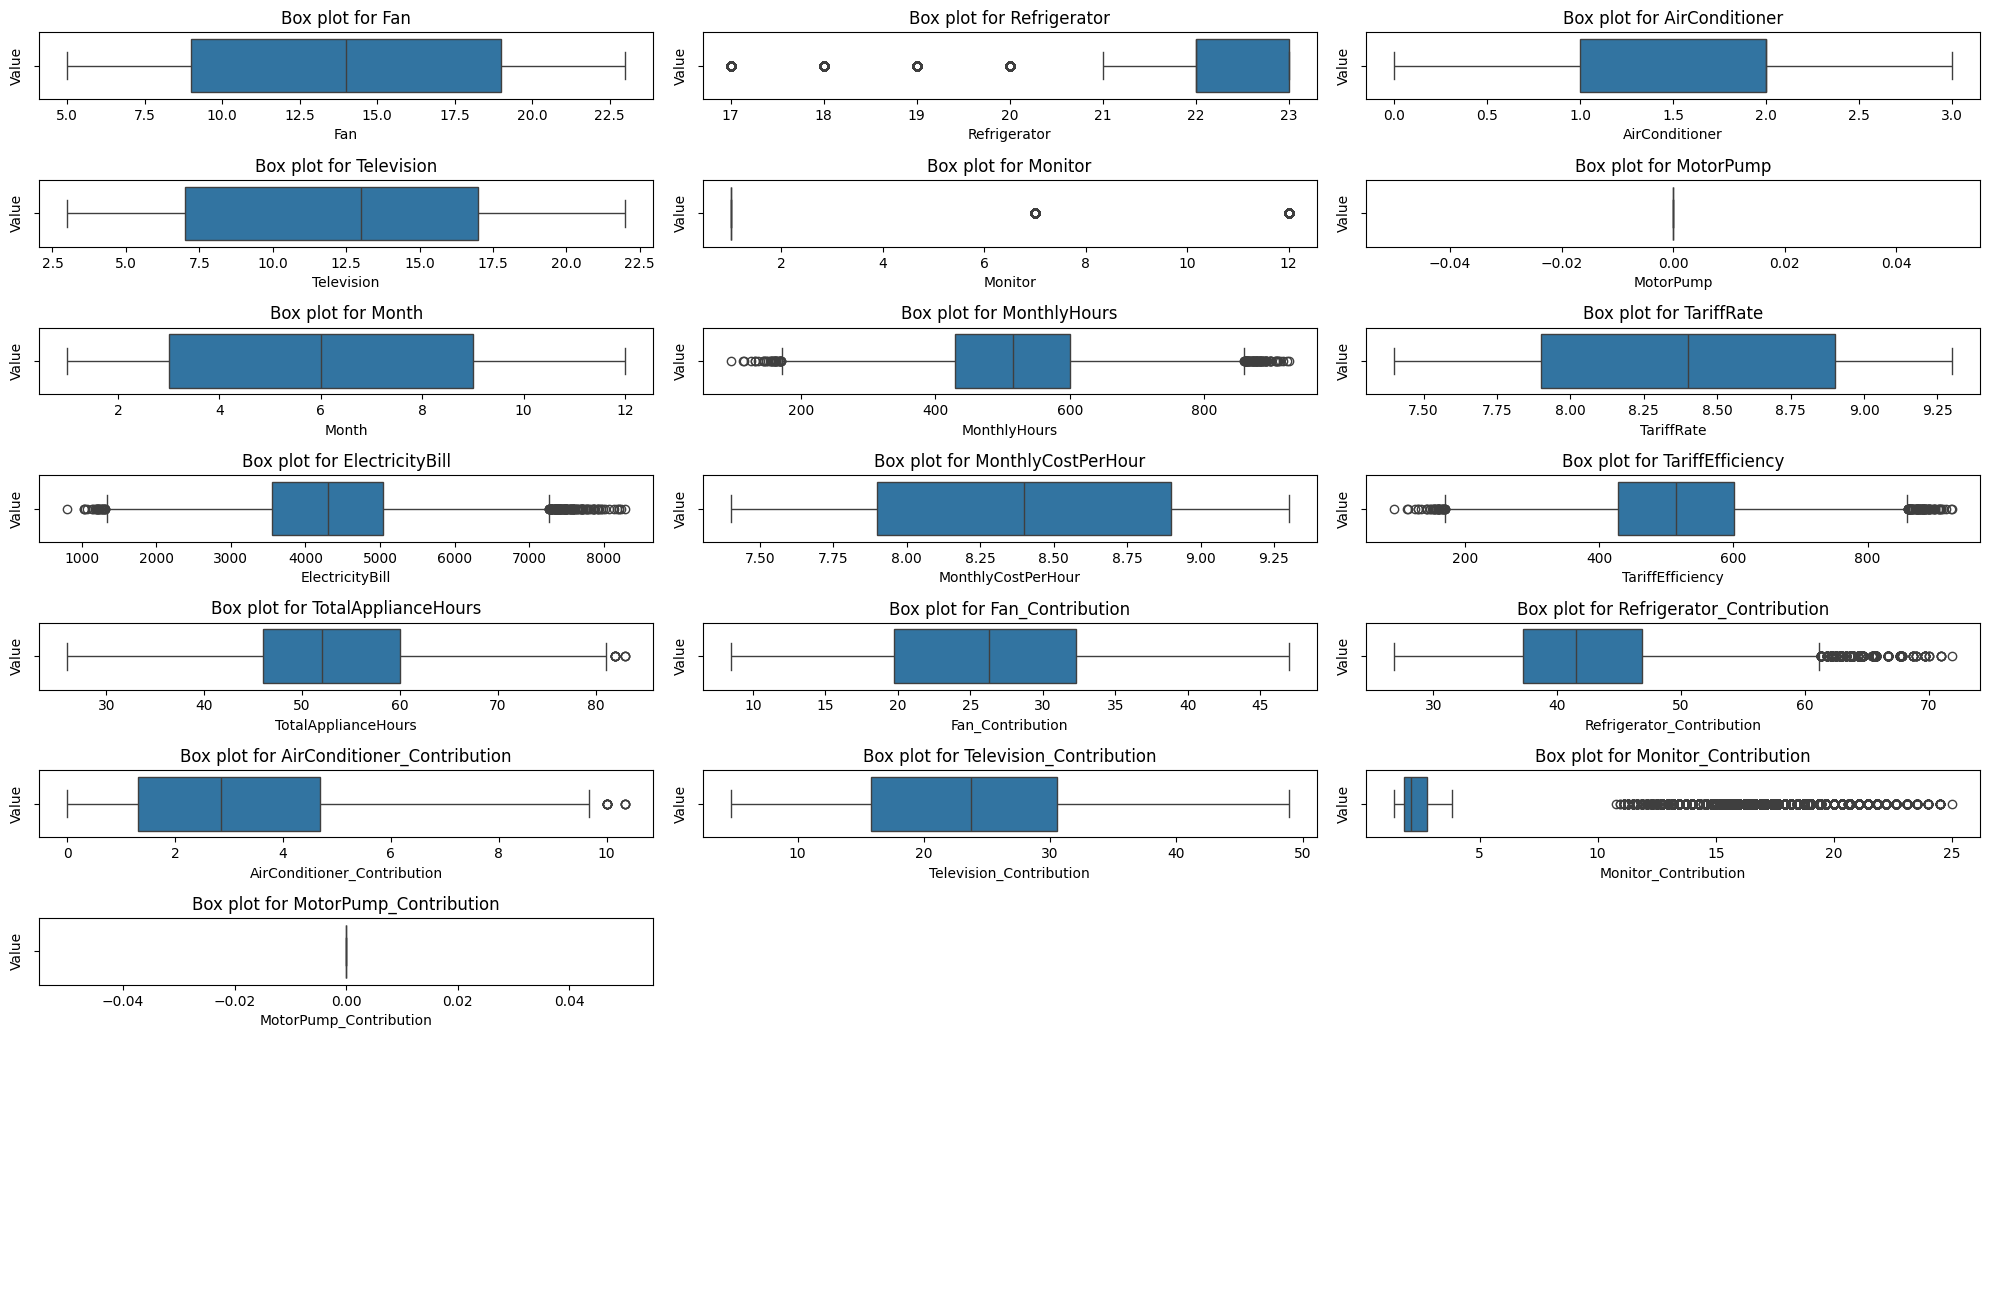

In [14]:
# Checking for outliers
#Only select numeric columns 
numeric_columns = df.select_dtypes(include=['float','integer']).columns[:]

# Grid layout
rows, cols = 9, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


In [15]:
# Dropping outliers
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['float','integer'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.01)  # .20
q3 = numeric_data.quantile(0.99)  # .80
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 45345
Number of rows after removing outliers: 45345
Number of rows removed: 0



Average Consumption per Appliance (kWh):
        Appliance  Average Consumption (kWh)
1    Refrigerator                  21.705458
0             Fan                  13.990694
3      Television                  12.502635
4         Monitor                   2.865057
2  AirConditioner                   1.503959
5       MotorPump                   0.000000


/tmp/ipykernel_46236/860222075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=appliance_consumption, x='Average Consumption (kWh)', y='Appliance', palette='coolwarm')


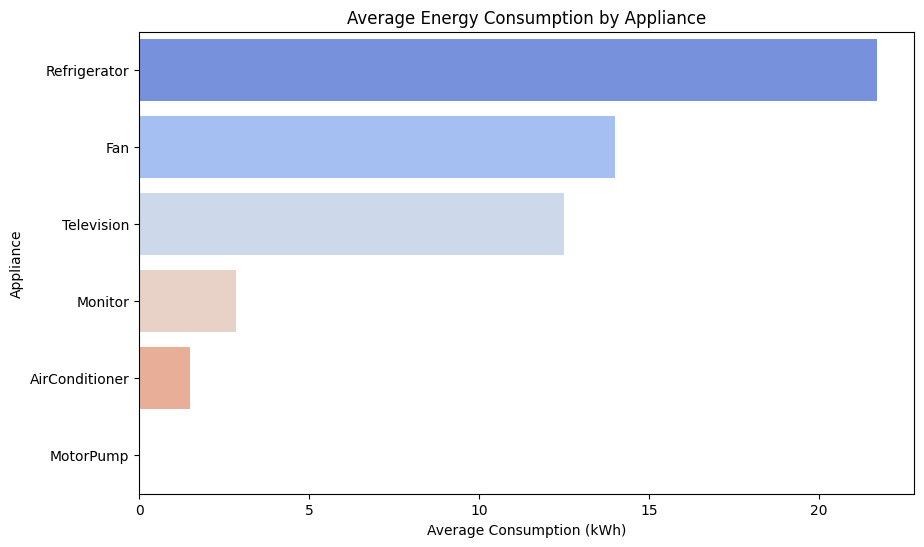

In [16]:

# --------- Objective 1: Appliance-Specific Energy Consumption ---------

# Calculate total consumption for each appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
appliance_consumption = df[appliances].mean().reset_index()
appliance_consumption.columns = ['Appliance', 'Average Consumption (kWh)']

# Sort appliances by average consumption
appliance_consumption = appliance_consumption.sort_values('Average Consumption (kWh)', ascending=False)
print("\nAverage Consumption per Appliance (kWh):")
print(appliance_consumption)

# Plot appliance-specific consumption
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_consumption, x='Average Consumption (kWh)', y='Appliance', palette='coolwarm')
plt.title('Average Energy Consumption by Appliance')
plt.xlabel('Average Consumption (kWh)')
plt.ylabel('Appliance')
plt.show()




Monthly Electricity Usage Trends:
    Month  ElectricityBill        Fan  Refrigerator  AirConditioner
0       1      4403.964784  13.937170     21.693242        1.486272
1       2      3919.195462  14.006635     21.728503        1.510616
2       3      4409.862445  14.040219     21.694176        1.506921
3       4      4254.603439  14.022751     21.747354        1.493122
4       5      4398.011479  14.102937     21.722986        1.477230
5       6      4219.997220  13.969840     21.700761        1.498295
6       7      4432.699030  14.120755     21.717520        1.511321
7       8      4401.935753  13.821879     21.696010        1.513771
8       9      4221.012469  13.756927     21.651385        1.528212
9      10      4409.195557  13.977925     21.661148        1.516280
10     11      4258.952020  14.037233     21.726433        1.508846
11     12      4422.842174  14.117391     21.728533        1.495109


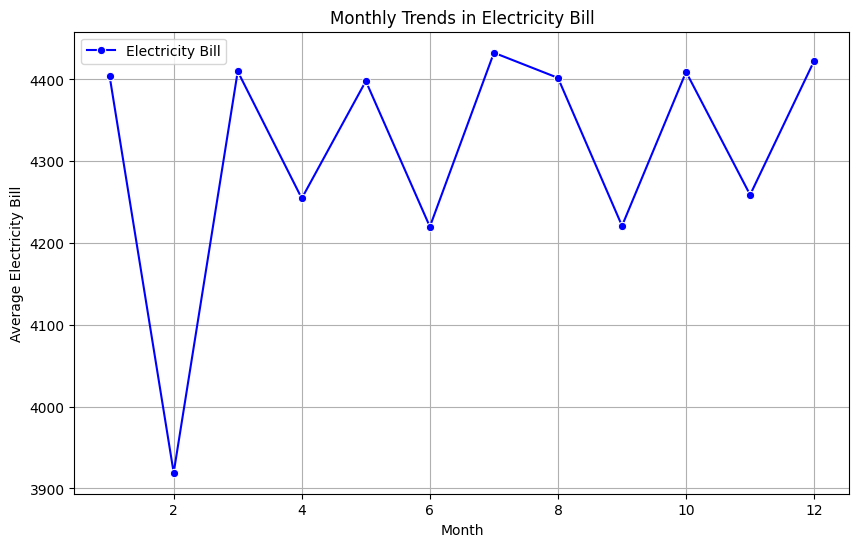

In [17]:
# --------- Objective 2: Monthly Electricity Usage Trends ---------

# Calculate average consumption and electricity bill by month
monthly_trends = df.groupby('Month')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
print("\nMonthly Electricity Usage Trends:")
print(monthly_trends)

# Plot total electricity bill over months
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trends, x='Month', y='ElectricityBill', marker='o', color='blue', label='Electricity Bill')
plt.title('Monthly Trends in Electricity Bill')
plt.xlabel('Month')
plt.ylabel('Average Electricity Bill')
plt.grid()
plt.legend()
plt.show()


City-Wise Electricity Usage and Billing:
           City  ElectricityBill        Fan  Refrigerator  AirConditioner
9   Navi Mumbai      4782.820213  13.901510     21.673644        1.490391
7        Mumbai      4770.510330  14.108573     21.712579        1.504919
12         Pune      4689.806420  14.134864     21.681492        1.493902
8        Nagpur      4613.464808  14.104048     21.746804        1.536222
1       Chennai      4545.783769  14.029993     21.723006        1.497883
6       Kolkata      4505.428358  14.015328     21.728467        1.491241
10    New Delhi      4382.525983  14.016503     21.698385        1.520014
5     Hyderabad      4304.749211  13.815717     21.695607        1.526767
4       Gurgaon      4300.230577  14.168172     21.758513        1.518416
11        Noida      4201.300680  13.976369     21.713570        1.468314
3     Faridabad      4166.154168  14.015566     21.704255        1.519198
0     Ahmedabad      4045.516179  13.935844     21.662831        1.468

/tmp/ipykernel_46236/1657182755.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_analysis, x='City', y='ElectricityBill', palette='viridis')


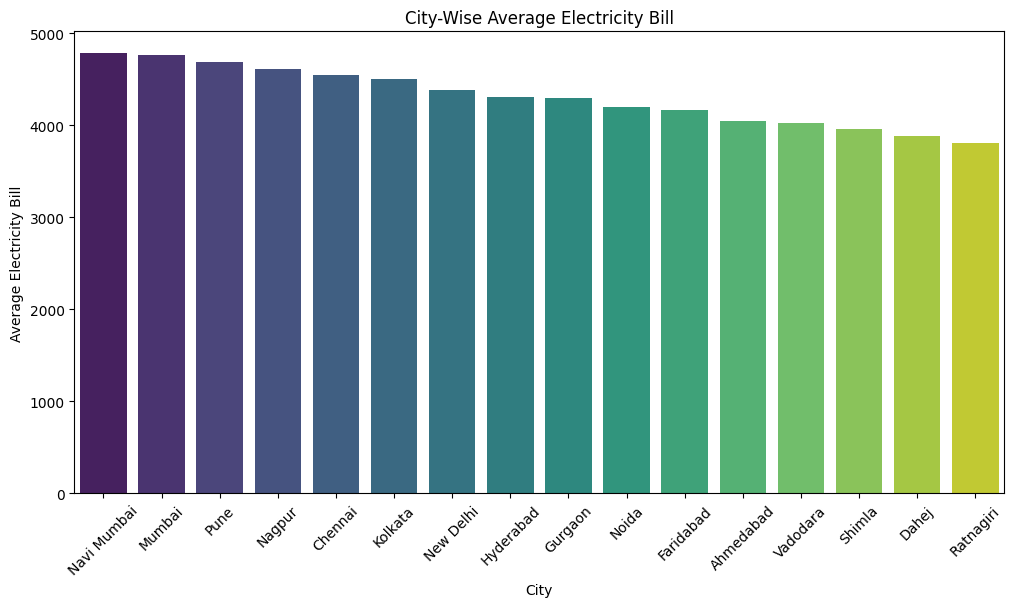

In [18]:
# --------- Objective 3: City-Wise Electricity Usage ---------

# Calculate average electricity consumption and bill by city
city_analysis = df.groupby('City')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
city_analysis = city_analysis.sort_values('ElectricityBill', ascending=False)
print("\nCity-Wise Electricity Usage and Billing:")
print(city_analysis)

# Plot city-wise electricity bills
plt.figure(figsize=(12, 6))
sns.barplot(data=city_analysis, x='City', y='ElectricityBill', palette='viridis')
plt.title('City-Wise Average Electricity Bill')
plt.xlabel('City')
plt.ylabel('Average Electricity Bill')
plt.xticks(rotation=45)
plt.show()


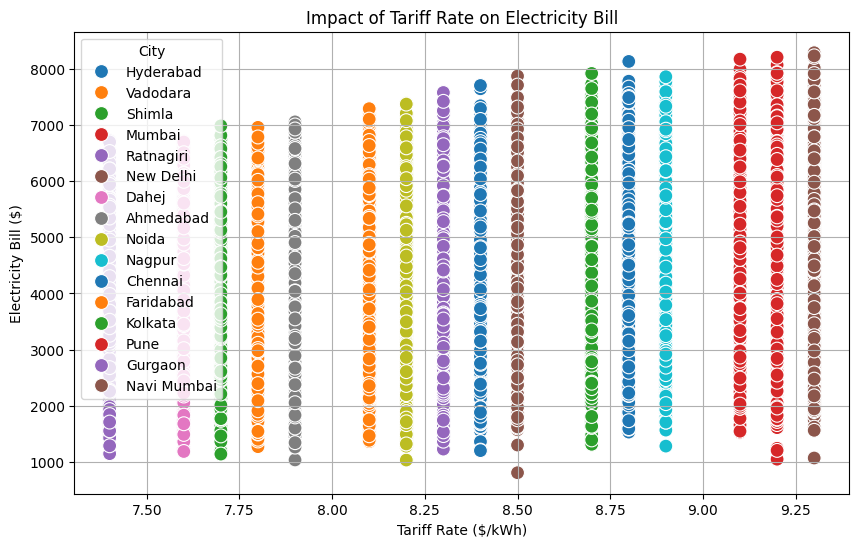


Correlation between Tariff Rate and Electricity Bill: 0.29


In [19]:
# --------- Objective 4: Impact of Tariff Rates ---------

# Analyze the relationship between TariffRate and ElectricityBill
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TariffRate', y='ElectricityBill', hue='City', palette='tab10', s=100)
plt.title('Impact of Tariff Rate on Electricity Bill')
plt.xlabel('Tariff Rate ($/kWh)')
plt.ylabel('Electricity Bill ($)')
plt.grid()
plt.show()

# Correlation between TariffRate and ElectricityBill
correlation = df[['TariffRate', 'ElectricityBill']].corr().iloc[0, 1]
print(f"\nCorrelation between Tariff Rate and Electricity Bill: {correlation:.2f}")


In [20]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill', 'season', 'MonthlyCostPerHour', 'TariffEfficiency',
       'TotalApplianceHours', 'Fan_Contribution', 'Refrigerator_Contribution',
       'AirConditioner_Contribution', 'Television_Contribution',
       'Monitor_Contribution', 'MotorPump_Contribution', 'UsageCategory'],
      dtype='object')


Proportion of Total Electricity Consumption by Appliance:
        Appliance  Total Consumption (kWh)  Proportion (%)
1    Refrigerator                 984234.0       41.290404
0             Fan                 634408.0       26.614568
3      Television                 566932.0       23.783827
4         Monitor                 129916.0        5.450212
2  AirConditioner                  68197.0        2.860988
5       MotorPump                      0.0        0.000000


/tmp/ipykernel_46236/3553329814.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=appliance_efficiency, x='Proportion (%)', y='Appliance', palette='crest')


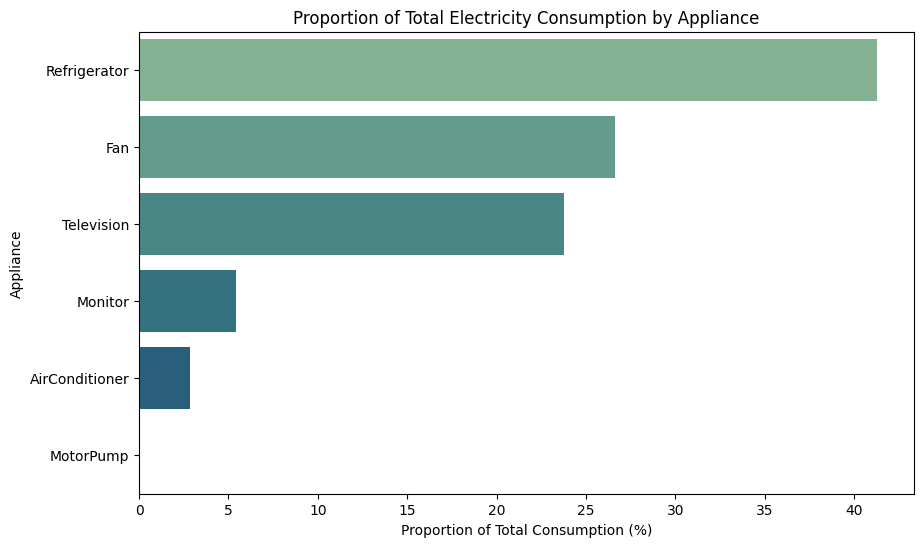

In [21]:
# --------- Objective 5: Total Energy Efficiency ---------

# Calculate the proportion of total electricity consumption by each appliance
df['TotalConsumption'] = df[appliances].sum(axis=1)
appliance_efficiency = df[appliances].sum().reset_index()
appliance_efficiency.columns = ['Appliance', 'Total Consumption (kWh)']
appliance_efficiency['Proportion (%)'] = (appliance_efficiency['Total Consumption (kWh)'] / appliance_efficiency['Total Consumption (kWh)'].sum()) * 100

# Sort by proportion of consumption
appliance_efficiency = appliance_efficiency.sort_values('Proportion (%)', ascending=False)
print("\nProportion of Total Electricity Consumption by Appliance:")
print(appliance_efficiency)

# Plot energy efficiency by appliance
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_efficiency, x='Proportion (%)', y='Appliance', palette='crest')
plt.title('Proportion of Total Electricity Consumption by Appliance')
plt.xlabel('Proportion of Total Consumption (%)')
plt.ylabel('Appliance')
plt.show()

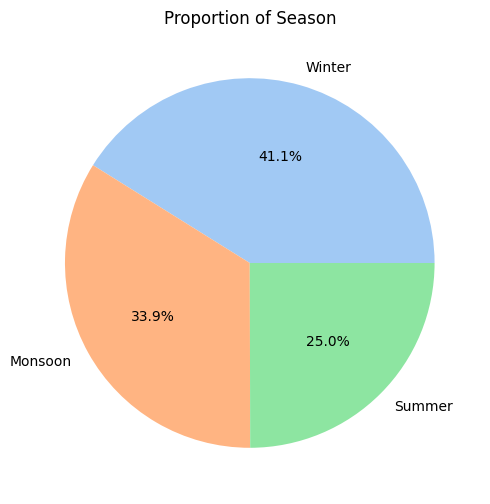

In [22]:
# seasonal pie chart distribution
    # Pie chart
plt.figure(figsize=(6, 6))
df['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Season')
plt.ylabel('')
plt.show()

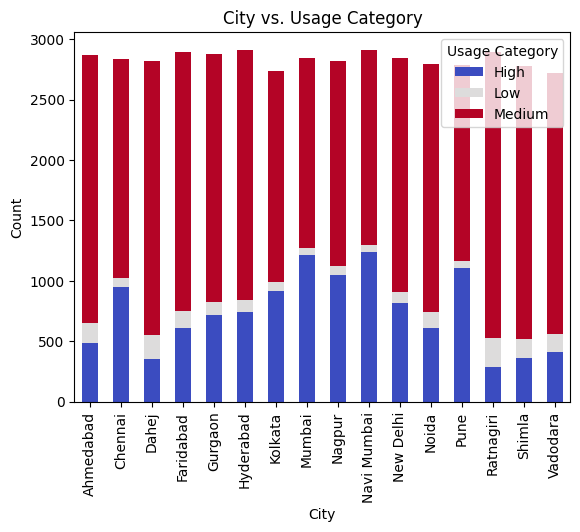

In [23]:
# Stacked bar chart example
pd.crosstab(df['City'], df['UsageCategory']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('City vs. Usage Category')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Usage Category')
plt.show()



Seasonal Analysis Results:
    season  ElectricityBill  TariffEfficiency  MonthlyCostPerHour  \
0  Monsoon      4317.538217        515.613409            8.371440   
1   Summer      4354.132942        520.268551            8.368445   
2   Winter      4281.298992        511.498096            8.368901   

   Fan_Contribution  Refrigerator_Contribution  AirConditioner_Contribution  \
0         26.069535                  42.583715                     2.946504   
1         26.208534                  42.467383                     2.899817   
2         26.159313                  42.458741                     2.914936   

   Television_Contribution  Monitor_Contribution  MotorPump_Contribution  
0                23.387541              5.012705                     0.0  
1                23.337047              5.087219                     0.0  
2                23.373794              5.093216                     0.0  


/tmp/ipykernel_46236/68868623.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_analysis, x='season', y='ElectricityBill', palette='coolwarm')


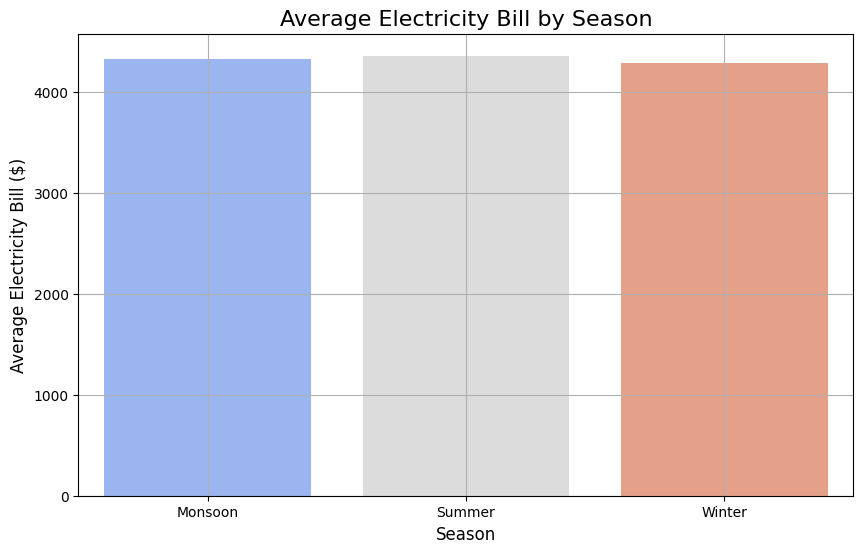

In [24]:
# --------- Step 1: Seasonal Analysis ---------

# Group by season and calculate average electricity bill, tariff efficiency, and appliance contributions
seasonal_analysis = df.groupby('season')[
    ['ElectricityBill', 'TariffEfficiency', 'MonthlyCostPerHour'] + 
    ['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
     'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution']
].mean().reset_index()

print("\nSeasonal Analysis Results:")
print(seasonal_analysis)

# Plot seasonal electricity bills
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_analysis, x='season', y='ElectricityBill', palette='coolwarm')
plt.title('Average Electricity Bill by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Electricity Bill ($)', fontsize=12)
plt.grid(True)
plt.show()



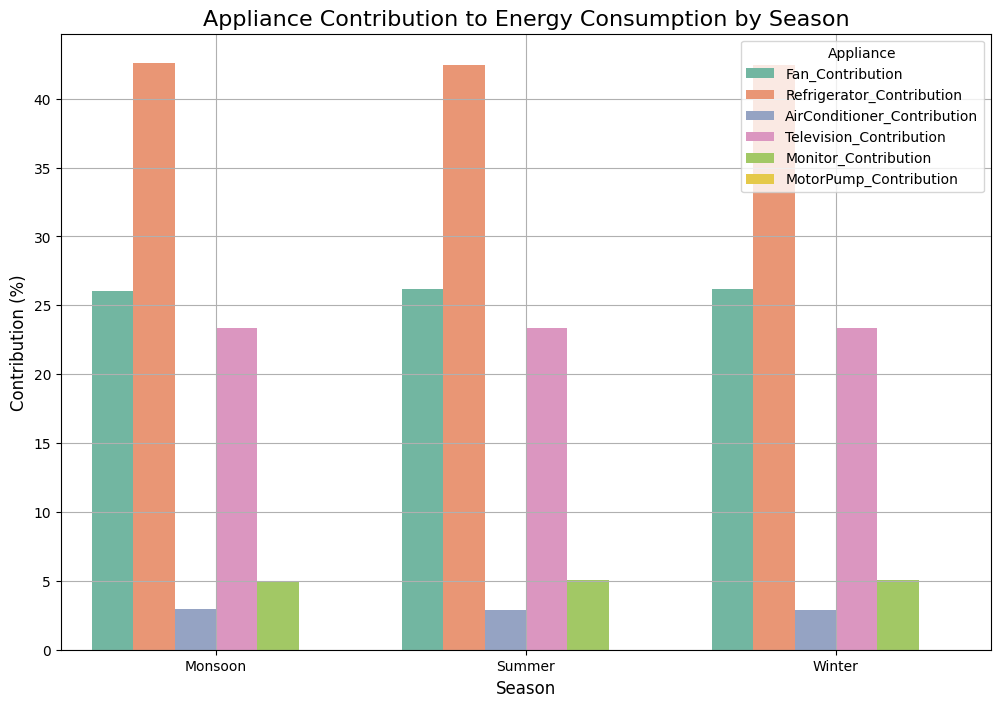

In [25]:
# Plot seasonal appliance contributions
appliance_contributions = seasonal_analysis.melt(
    id_vars='season', 
    value_vars=['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
                'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution'],
    var_name='Appliance',
    value_name='Contribution (%)'
)

plt.figure(figsize=(12, 8))
sns.barplot(data=appliance_contributions, x='season', y='Contribution (%)', hue='Appliance', palette='Set2')
plt.title('Appliance Contribution to Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.legend(title='Appliance', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()



Cost Efficiency by City and Season:
           City   season  MonthlyCostPerHour  TariffEfficiency
0     Ahmedabad  Monsoon                 7.9        511.117053
1     Ahmedabad   Summer                 7.9        516.934936
2     Ahmedabad   Winter                 7.9        509.988034
3       Chennai  Monsoon                 8.8        521.758376
4       Chennai   Summer                 8.8        520.644970
5       Chennai   Winter                 8.8        509.855925
6         Dahej  Monsoon                 7.6        508.059686
7         Dahej   Summer                 7.6        511.710602
8         Dahej   Winter                 7.6        511.913527
9     Faridabad  Monsoon                 8.1        517.497988
10    Faridabad   Summer                 8.1        518.327988
11    Faridabad   Winter                 8.1        509.488852
12      Gurgaon  Monsoon                 8.3        516.590398
13      Gurgaon   Summer                 8.3        527.807799
14      Gurgaon   

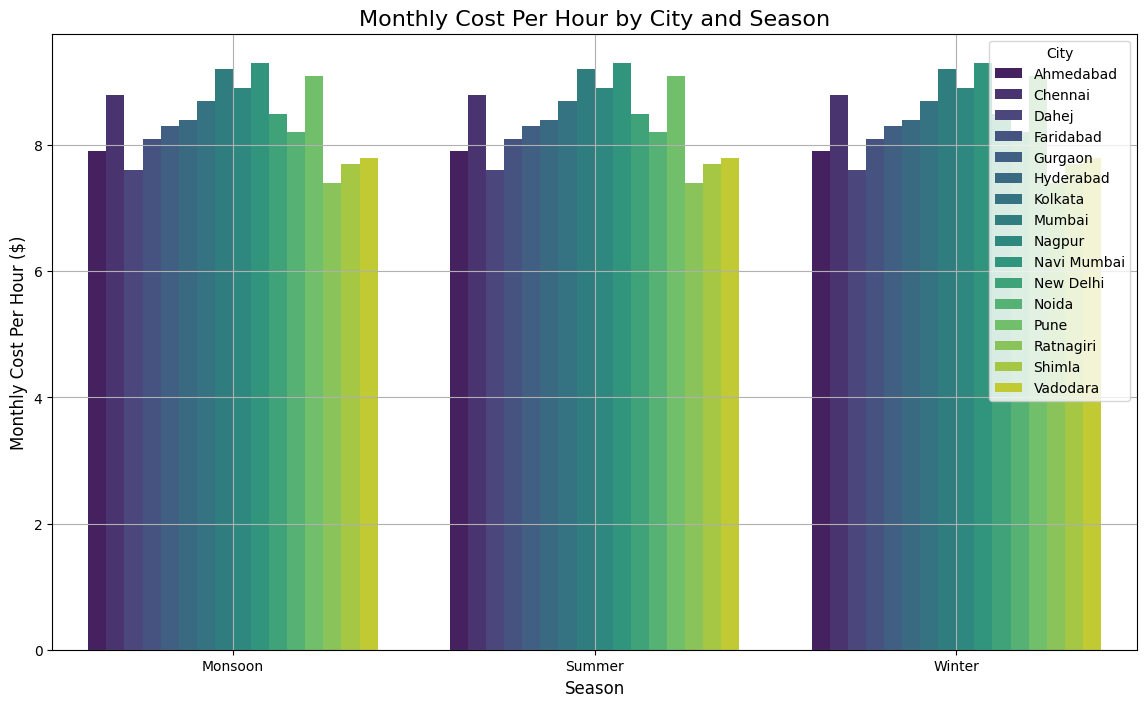

In [26]:
# --------- Step 2: Cost Efficiency by Season and City ---------

# Group by city and season to calculate cost efficiency
city_season_analysis = df.groupby(['City', 'season'])[['MonthlyCostPerHour', 'TariffEfficiency']].mean().reset_index()
print("\nCost Efficiency by City and Season:")
print(city_season_analysis)

# Plot cost efficiency by season for top cities
plt.figure(figsize=(14, 8))
sns.barplot(data=city_season_analysis, x='season', y='MonthlyCostPerHour', hue='City', palette='viridis')
plt.title('Monthly Cost Per Hour by City and Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Monthly Cost Per Hour ($)', fontsize=12)
plt.legend(title='City', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


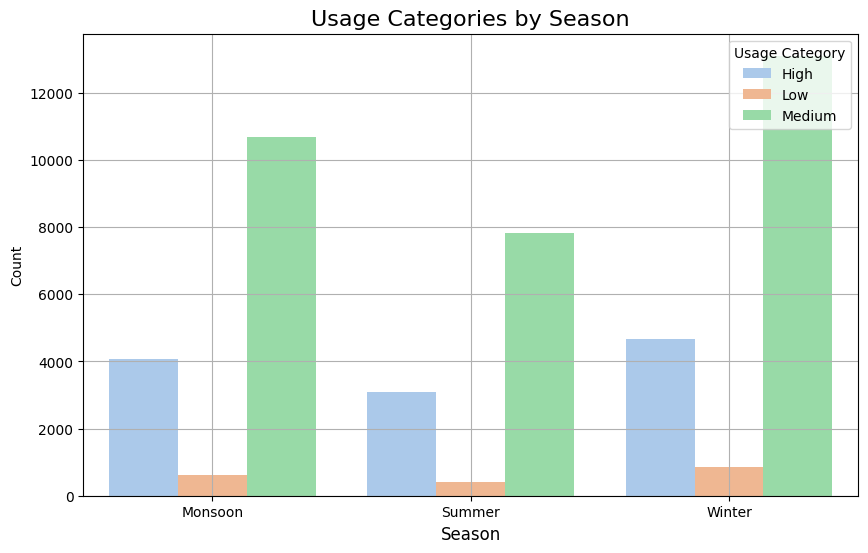

In [27]:
# --------- Step 3: UsageCategory Trends ---------

# Count the number of occurrences of each usage category by season
usage_category_analysis = df.groupby(['season', 'UsageCategory']).size().reset_index(name='Count')

# Plot usage categories by season
plt.figure(figsize=(10, 6))
sns.barplot(data=usage_category_analysis, x='season', y='Count', hue='UsageCategory', palette='pastel')
plt.title('Usage Categories by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count')
plt.legend(title='Usage Category', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


Seasonal Appliance Usage and Total Consumption:
    season  TotalApplianceHours  TotalConsumption
0  Monsoon            52.425088         52.425088
1   Summer            52.656272         52.656272
2   Winter            52.631791         52.631791


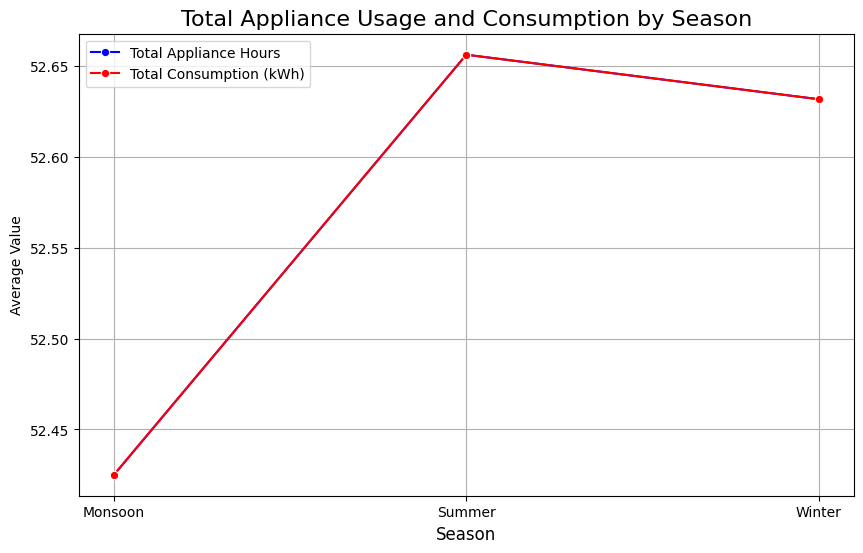

In [28]:
# --------- Step 4: Appliance Usage Patterns ---------

# Calculate average TotalApplianceHours and TotalConsumption by season
season_usage_analysis = df.groupby('season')[['TotalApplianceHours', 'TotalConsumption']].mean().reset_index()
print("\nSeasonal Appliance Usage and Total Consumption:")
print(season_usage_analysis)

# Plot TotalApplianceHours and TotalConsumption by season
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_usage_analysis, x='season', y='TotalApplianceHours', marker='o', label='Total Appliance Hours', color='blue')
sns.lineplot(data=season_usage_analysis, x='season', y='TotalConsumption', marker='o', label='Total Consumption (kWh)', color='red')
plt.title('Total Appliance Usage and Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Value')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


In [29]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill', 'season', 'MonthlyCostPerHour', 'TariffEfficiency',
       'TotalApplianceHours', 'Fan_Contribution', 'Refrigerator_Contribution',
       'AirConditioner_Contribution', 'Television_Contribution',
       'Monitor_Contribution', 'MotorPump_Contribution', 'UsageCategory',
       'TotalConsumption'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fan                          45345 non-null  int64  
 1   Refrigerator                 45345 non-null  float64
 2   AirConditioner               45345 non-null  float64
 3   Television                   45345 non-null  float64
 4   Monitor                      45345 non-null  float64
 5   MotorPump                    45345 non-null  int64  
 6   Month                        45345 non-null  int64  
 7   City                         45345 non-null  object 
 8   Company                      45345 non-null  object 
 9   MonthlyHours                 45345 non-null  int64  
 10  TariffRate                   45345 non-null  float64
 11  ElectricityBill              45345 non-null  float64
 12  season                       45345 non-null  object 
 13  MonthlyCostPerHo

In [31]:
df = df.drop(columns=['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
                     'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution', 
                      'MonthlyCostPerHour', 'MotorPump', 'TotalConsumption', 'Monitor', 'TariffEfficiency'])

In [32]:
df.head()

Fan  Refrigerator  AirConditioner  Television  Month       City  \
0   16          23.0             2.0         6.0     10  Hyderabad   
1   19          22.0             2.0         3.0      5   Vadodara   
2    7          20.0             2.0         6.0      7     Shimla   
3    7          22.0             3.0        21.0      6     Mumbai   
4   11          23.0             2.0        11.0      2     Mumbai   

                                     Company  MonthlyHours  TariffRate  \
0                    Tata Power Company Ltd.           384         8.4   
1                                       NHPC           488         7.8   
2                            Jyoti Structure           416         7.7   
3                            Power Grid Corp           475         9.2   
4  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457         9.2   

   ElectricityBill   season  TotalApplianceHours UsageCategory  
0           3225.6   Winter                 48.0        Medium  
1           3806.4   Summer                 47.0        Medium  
2           3203.2  Monsoon                 42.0        Medium  
3           4370.0  Monsoon                 54.0        Medium  
4           4204.4   Winter                 48.0        Medium

# Modeling 

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Preprocessing 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# time 
import time

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fan                  45345 non-null  int64  
 1   Refrigerator         45345 non-null  float64
 2   AirConditioner       45345 non-null  float64
 3   Television           45345 non-null  float64
 4   Month                45345 non-null  int64  
 5   City                 45345 non-null  object 
 6   Company              45345 non-null  object 
 7   MonthlyHours         45345 non-null  int64  
 8   TariffRate           45345 non-null  float64
 9   ElectricityBill      45345 non-null  float64
 10  season               45345 non-null  object 
 11  TotalApplianceHours  45345 non-null  float64
 12  UsageCategory        45345 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 4.5+ MB


In [35]:
df.head()

Fan  Refrigerator  AirConditioner  Television  Month       City  \
0   16          23.0             2.0         6.0     10  Hyderabad   
1   19          22.0             2.0         3.0      5   Vadodara   
2    7          20.0             2.0         6.0      7     Shimla   
3    7          22.0             3.0        21.0      6     Mumbai   
4   11          23.0             2.0        11.0      2     Mumbai   

                                     Company  MonthlyHours  TariffRate  \
0                    Tata Power Company Ltd.           384         8.4   
1                                       NHPC           488         7.8   
2                            Jyoti Structure           416         7.7   
3                            Power Grid Corp           475         9.2   
4  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457         9.2   

   ElectricityBill   season  TotalApplianceHours UsageCategory  
0           3225.6   Winter                 48.0        Medium  
1           3806.4   Summer                 47.0        Medium  
2           3203.2  Monsoon                 42.0        Medium  
3           4370.0  Monsoon                 54.0        Medium  
4           4204.4   Winter                 48.0        Medium

### one hot encoder 

In [36]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['City', 'Company', 'season', 'UsageCategory'], dtype='object')

In [37]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['City', 'Company', 'season', 'UsageCategory']

# Create a copy of the DataFrame with the selected columns
encoded_df = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
df= encoded_df.copy()

df.head()

Fan  Refrigerator  AirConditioner  Television  Month  MonthlyHours  \
0   16          23.0             2.0         6.0     10           384   
1   19          22.0             2.0         3.0      5           488   
2    7          20.0             2.0         6.0      7           416   
3    7          22.0             3.0        21.0      6           475   
4   11          23.0             2.0        11.0      2           457   

   TariffRate  ElectricityBill  TotalApplianceHours  City_Chennai  City_Dahej  \
0         8.4           3225.6                 48.0           0.0         0.0   
1         7.8           3806.4                 47.0           0.0         0.0   
2         7.7           3203.2                 42.0           0.0         0.0   
3         9.2           4370.0                 54.0           0.0         0.0   
4         9.2           4204.4                 48.0           0.0         0.0   

   City_Faridabad  City_Gurgaon  City_Hyderabad  City_Kolkata  City_Mumbai  \
0             0.0           0.0             1.0           0.0          0.0   
1             0.0           0.0             0.0           0.0          0.0   
2             0.0           0.0             0.0           0.0          0.0   
3             0.0           0.0             0.0           0.0          1.0   
4             0.0           0.0             0.0           0.0          1.0   

   City_Nagpur  City_Navi Mumbai  City_New Delhi  City_Noida  City_Pune  \
0          0.0               0.0             0.0         0.0        0.0   
1          0.0               0.0             0.0         0.0        0.0   
2          0.0               0.0             0.0         0.0        0.0   
3          0.0               0.0             0.0         0.0        0.0   
4          0.0               0.0             0.0         0.0        0.0   

   City_Ratnagiri  City_Shimla  City_Vadodara  \
0             0.0          0.0            0.0   
1             0.0          0.0            1.0   
2             0.0          1.0            0.0   
3             0.0          0.0            0.0   
4             0.0          0.0            0.0   

   Company_Bonfiglioli Transmission Pvt. Ltd.  Company_CESC  \
0                                         0.0           0.0   
1                                         0.0           0.0   
2                                         0.0           0.0   
3                                         0.0           0.0   
4                                         0.0           0.0   

   Company_GE T&D India Limited  Company_Guj Ind Power  \
0                           0.0                    0.0   
1                           0.0                    0.0   
2                           0.0                    0.0   
3                           0.0                    0.0   
4                           0.0                    0.0   

   Company_Indowind Energy  Company_JSW Energy Ltd.  Company_Jaiprakash Power  \
0                      0.0                      0.0                       0.0   
1                      0.0                      0.0                       0.0   
2                      0.0                      0.0                       0.0   
3                      0.0                      0.0                       0.0   
4                      0.0                      0.0                       0.0   

   Company_Jyoti Structure  Company_KEC International  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      1.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   

   Company_Kalpataru Power  Company_L&T Transmission & Distribution  \
0                      0.0                                      0.0   
1                      0.0                                      0.0   
2                      0.0                                      0.0   
3                   

In [38]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Month',
       'MonthlyHours', 'TariffRate', 'ElectricityBill', 'TotalApplianceHours',
       'City_Chennai', 'City_Dahej', 'City_Faridabad', 'City_Gurgaon',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai', 'City_Nagpur',
       'City_Navi Mumbai', 'City_New Delhi', 'City_Noida', 'City_Pune',
       'City_Ratnagiri', 'City_Shimla', 'City_Vadodara',
       'Company_Bonfiglioli Transmission Pvt. Ltd.', 'Company_CESC',
       'Company_GE T&D India Limited', 'Company_Guj Ind Power',
       'Company_Indowind Energy', 'Company_JSW Energy Ltd.',
       'Company_Jaiprakash Power', 'Company_Jyoti Structure',
       'Company_KEC International', 'Company_Kalpataru Power',
       'Company_L&T Transmission & Distribution',
       'Company_Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.',
       'Company_NHPC', 'Company_NLC India', 'Company_NTPC Pvt. Ltd.',
       'Company_Neueon Towers / Sujana Towers Ltd.',
  

In [39]:
#df = df.drop(columns=['Company_nan', 'season_nan', 'UsageCategory_nan'])

### Define the features and target variable 

In [40]:
# drop null values
df = df.dropna()

# Features 
X = df.drop(columns={'ElectricityBill'})

# Target variable 
y = df['ElectricityBill']


# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=127)

### Standardize 


In [41]:
#!pip install --upgrade pandas

In [42]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)



# # Convert scaled data back to DataFrame with original column names
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# # Reset the index of y_train to match X_train_scaled
# y_train = y_train.reset_index(drop=True)
# X_train_scaled = X_train_scaled.reset_index(drop=True)

# # Columns to scale
# columns_to_scale = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Month',
#        'MonthlyHours', 'TariffRate', 'TotalApplianceHours']

# # Initialize the standard scaler
# scaler = StandardScaler()


# # Fit and transform the specified columns in the training data
# X_train_scaled = X_train.copy()
# X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# # Transform the specified columns in the test data

# X_test_scaled = X_test.copy()
# X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [43]:
X_train_scaled

array([[ 1.09907647,  0.77297456,  1.33354889, ..., -0.83589009,
        -0.20804614, -1.51476852],
       [-1.27556801, -2.81849838,  0.43765061, ..., -0.83589009,
        -0.20804614,  0.66016688],
       [ 0.91641151,  0.77297456, -0.45824767, ..., -0.83589009,
        -0.20804614,  0.66016688],
       ...,
       [-0.91023809, -1.02276191,  1.33354889, ...,  1.19632953,
        -0.20804614,  0.66016688],
       [-1.64089793, -1.62134074, -1.35414596, ...,  1.19632953,
         4.8066261 , -1.51476852],
       [-1.09290305,  0.77297456,  1.33354889, ...,  1.19632953,
        -0.20804614,  0.66016688]])

In [44]:
# Define the models
models = {
    #'Decision Tree': DecisionTreeRegressor(),
    #'Extra Trees': ExtraTreesRegressor(),
    #'Random Forest': RandomForestRegressor(),
    #'Gradient Boosting': GradientBoostingRegressor(),
    #'KNN Regression': KNeighborsRegressor(),
    #'LGBM Regressor': LGBMRegressor(verbose=0),
    #'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(8)

Model       MAE         MSE       RMSE      MAPE        R2  \
0  XGB Regressor  8.187647  145.642129  12.068228  0.205852  0.999874   

   Training Time (s)  Prediction Time (s)  
0           7.568884             0.013879

In [45]:
# Plotting a grouped bar graph
import plotly.express as px
fig = px.bar(results_df, x='Model',
             y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2', 'Training Time (s)', 'Prediction Time (s)'],
             labels={'value': 'Metric Value'}, 
             title='Best Model',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=700,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
             
fig.show()

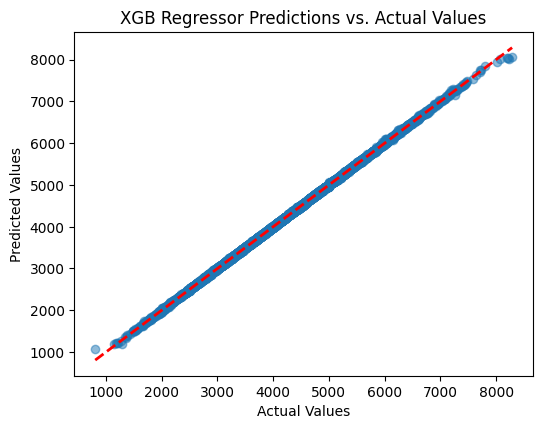

In [46]:
# Scater plot

# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

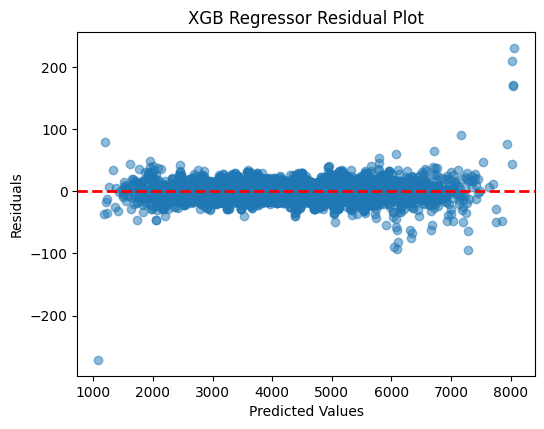

In [47]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

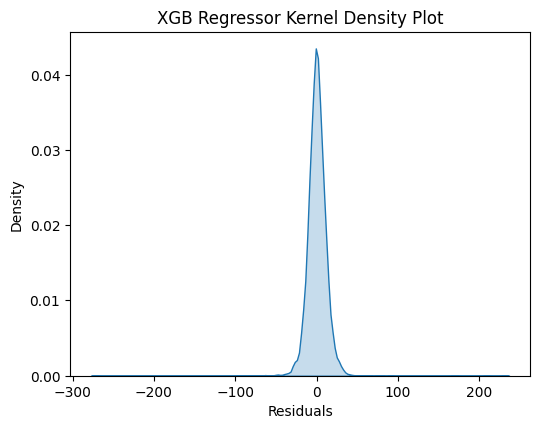

In [48]:
# Kernel Density Plot
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Kernel density plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True)
    plt.title(f'{model_name} Kernel Density Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

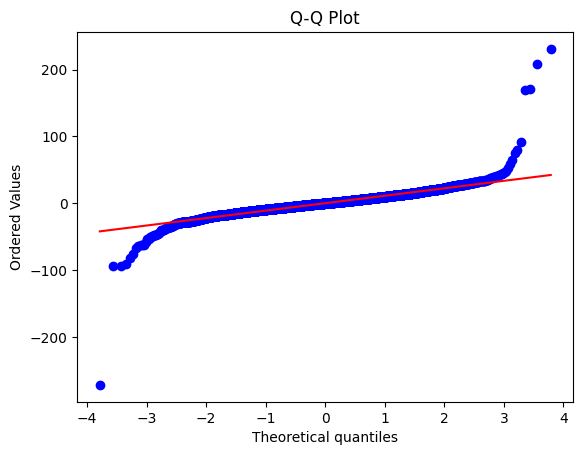

In [49]:
import scipy.stats as stats


stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [50]:
# Initialize the Random Forest Regressor
rf_model = XGBRegressor()

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Adjusted R2': [], 'COD': [], 'Training Time (s)': [], 'Prediction Time (s)': []
}

# Measure the training time
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Measure the prediction time
start_time = time.time()
y_pred = rf_model.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Calculate Coefficient of Determination (COD) (it's equivalent to R2 in sklearn)
cod = r2  # COD is the same as R2 in sklearn metrics.

# Calculate Adjusted R2
n = X_test_scaled.shape[0]  # Number of samples
p = X_test_scaled.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Store results in a dictionary
results['Model'].append('Random Forest')
results['MAE'].append(mae)
results['MSE'].append(mse)
results['RMSE'].append(rmse)
results['R2'].append(r2)
results['Adjusted R2'].append(adjusted_r2)
results['COD'].append(cod)
results['MAPE'].append(mape)
results['Training Time (s)'].append(training_time)
results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df


Model       MAE         MSE       RMSE      MAPE        R2  \
0  Random Forest  8.187647  145.642129  12.068228  0.205852  0.999874   

   Adjusted R2       COD  Training Time (s)  Prediction Time (s)  
0     0.999873  0.999874          14.506592             0.044282

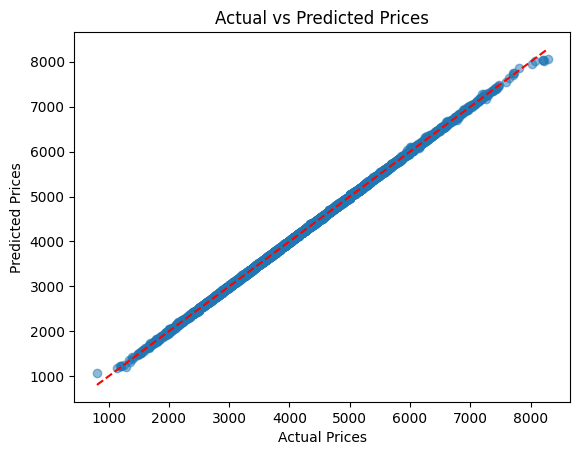

In [51]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

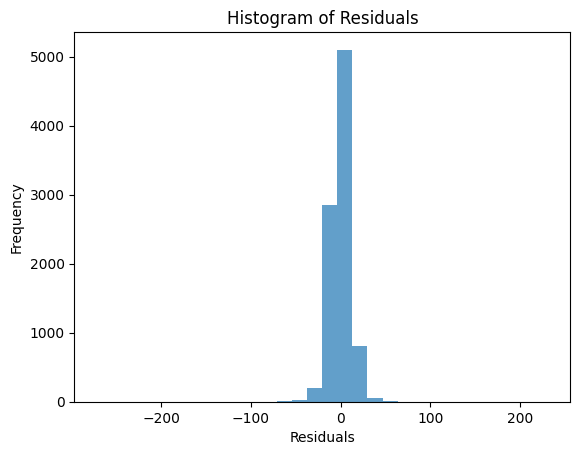

In [52]:
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


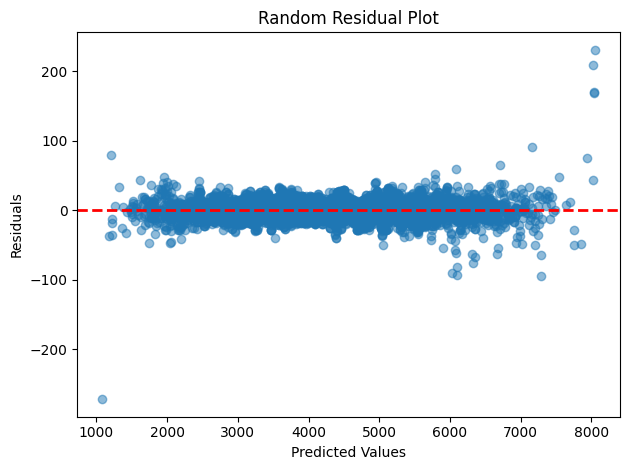

In [53]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Random Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

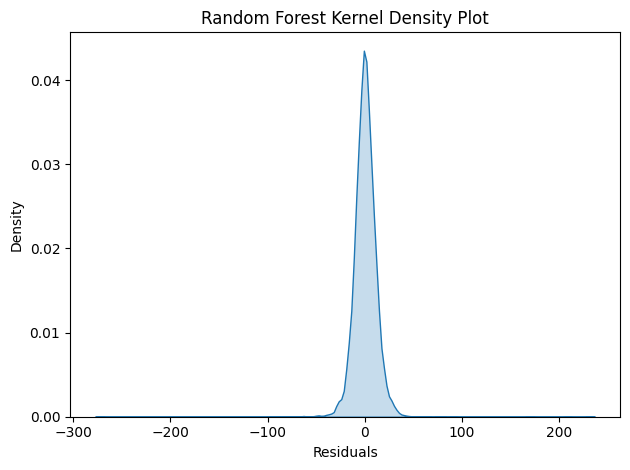

In [54]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

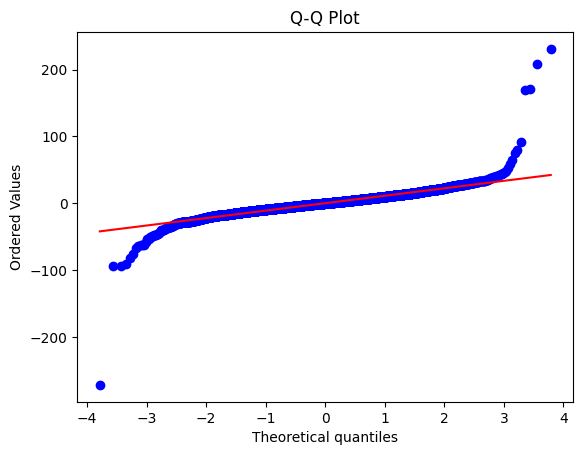

In [55]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


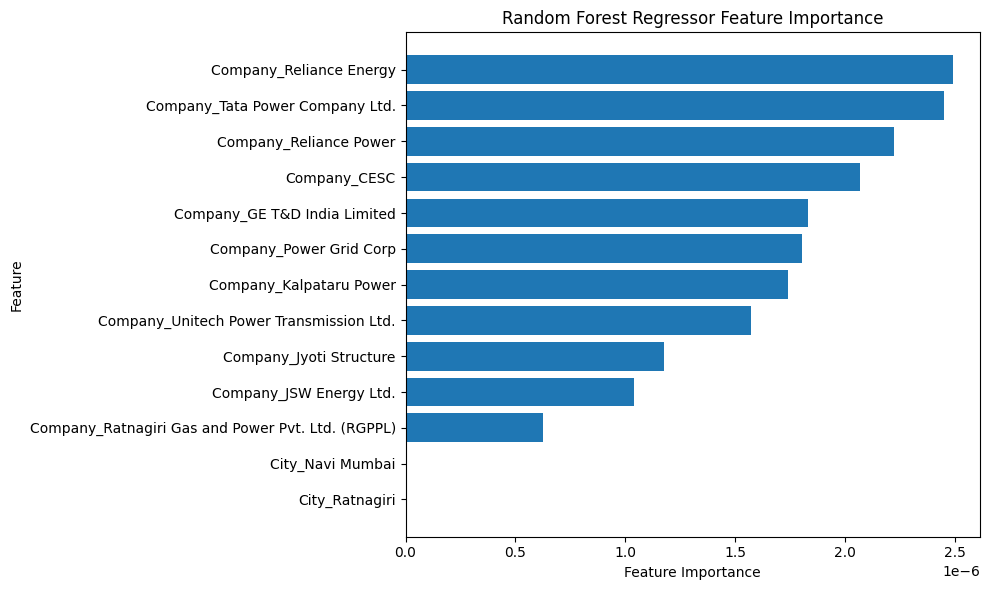

In [56]:
# Get Feature Importance
feature_importance =  model.feature_importances_

# Create a DataFrame to view feature importance 
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[45:75]

# Plot Horizontal Bar Graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have most important at the top
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [75]:
import optuna

def objective(trial):
    # Define hyperparameters to search
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100 ),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'random_state': 42  # Fixed random state for reproducibility
    }
    
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor(**params)

    # Fit the model on the entire training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data (MAE)
    mae_test = mean_absolute_error(y_test, y_pred)

    return mae_test


In [76]:
# study = optuna.create_study(direction='minimize')  # Minimize MAE
# study.optimize(objective, n_trials=10, show_progress_bar=True, n_jobs= -1)  # Adjust n_trials as needed

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

[I 2025-01-30 23:06:56,430] A new study created in memory with name: no-name-24a3194a-4326-4a9f-adcd-ab68074f9827


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-01-30 23:07:00,434] Trial 5 finished with value: 2092.748434293787 and parameters: {'n_estimators': 11, 'max_depth': 3, 'learning_rate': 0.06368110968177905, 'subsample': 0.866802918986237, 'colsample_bytree': 0.6698832223907863, 'gamma': 0.6866528552233774, 'reg_alpha': 6.892490936871575e-05, 'reg_lambda': 0.0011058958073337983}. Best is trial 5 with value: 2092.748434293787.
[I 2025-01-30 23:07:06,700] Trial 0 finished with value: 1138.0717010191827 and parameters: {'n_estimators': 20, 'max_depth': 5, 'learning_rate': 0.06446811181593393, 'subsample': 0.9865492814462051, 'colsample_bytree': 0.803764179099833, 'gamma': 0.04069000674396377, 'reg_alpha': 0.2435372223149236, 'reg_lambda': 0.001364237994582721}. Best is trial 0 with value: 1138.0717010191827.
[I 2025-01-30 23:07:08,206] Trial 6 finished with value: 272.23638457427523 and parameters: {'n_estimators': 27, 'max_depth': 4, 'learning_rate': 0.097437128712531, 'subsample': 0.983214106837593, 'colsample_bytree': 0.916354

In [77]:
best_params = {
    'n_estimators': 94,
    'max_depth': 9,
    'learning_rate': 0.08604881522344099,
    'subsample': 0.6873155261608964,
    'colsample_bytree': 0.9661320181346986,
    'gamma': 0.10461725560383399,
    'reg_alpha': 0.8271231476327358,
    'reg_lambda': 0.0035556275483787235
}

# Initialize the XGBRegressor model with best hyperparameters
# (Assuming XGBRegressor is defined/imported)
from xgboost import XGBRegressor

best_xgb_model = XGBRegressor(**best_params, random_state=42)

In [78]:
#best_params = trial.params

# Initialize the XGBRegressor model with best hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)

# Fit the model on the entire training data
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model on the testing data
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)


MAE: 6.202651659542477
R2: 0.9999247678912624
MAPE: 0.15388627500146065
MSE: 85.72089328257559
RMSE: 9.25855784032133


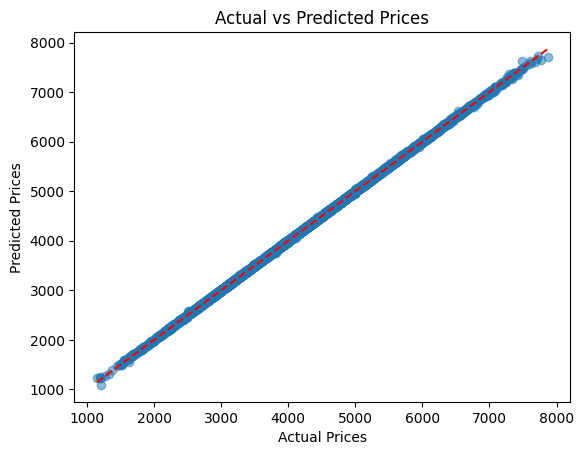

In [79]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

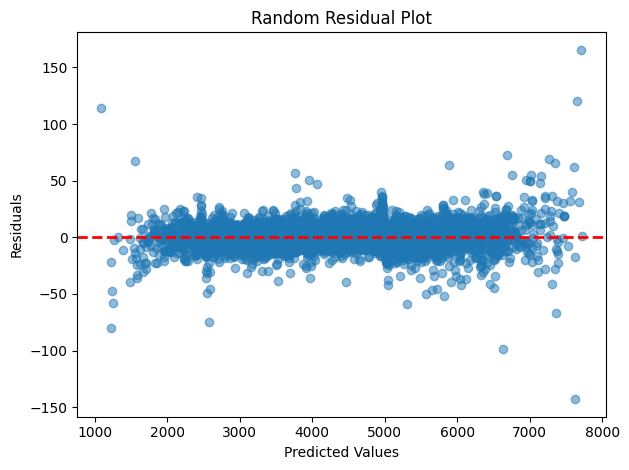

In [80]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Random Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

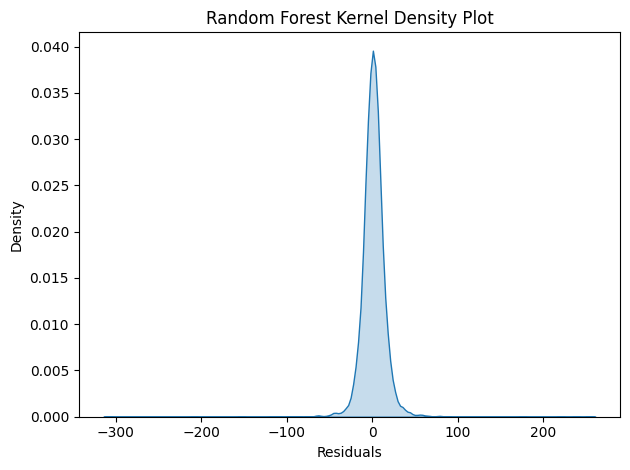

In [63]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

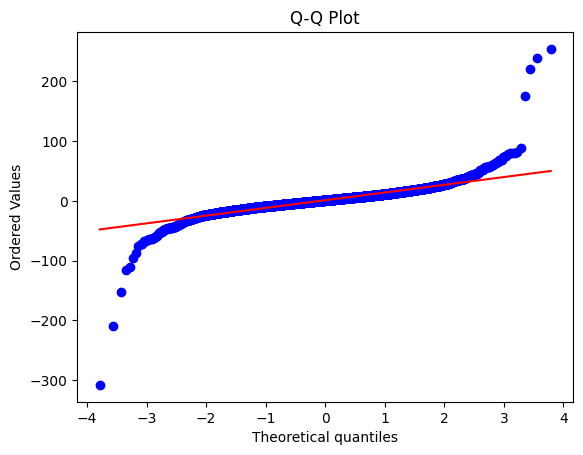

In [64]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [81]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Drop null values
df = df.dropna()

# Features and target variable
X = df.drop(columns=['ElectricityBill'])
y = df['ElectricityBill']

# Train-validation-test split (Train: 64%, Val: 16%, Test: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=127)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.55, random_state=127)  # 16% Val, 20% Test


In [82]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [83]:
# Initialize the model
xgb_model = XGBRegressor(reg_alpha=0.1, reg_lambda=1, random_state=42)

# Measure the training time
start_time = time.time()
xgb_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Measure the prediction time
start_time = time.time()
y_pred_val = xgb_model.predict(X_val_scaled)
prediction_time = time.time() - start_time

# Evaluate model on validation set
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
r2 = r2_score(y_val, y_pred_val)

# Print results
print(f"Validation Results for XGB Regressor:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}")
print(f"Training Time: {training_time:.2f} sec, Prediction Time: {prediction_time:.2f} sec")


Validation Results for XGB Regressor:
MAE: 8.5985, MSE: 154.7661, RMSE: 12.4405, MAPE: 0.21%, R2: 0.9999
Training Time: 7.64 sec, Prediction Time: 0.02 sec


In [84]:
from sklearn.model_selection import KFold

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=127)

# Store results
cv_results = {'Fold': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Perform cross-validation
fold = 1
for train_idx, val_idx in kf.split(X, y):
    # Split data
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    # Scale data
    X_train_cv_scaled = scaler.fit_transform(X_train_cv)
    X_val_cv_scaled = scaler.transform(X_val_cv)

    # Train the model
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train_cv_scaled, y_train_cv)

    # Predict on validation fold
    y_pred_cv = xgb_model.predict(X_val_cv_scaled)

    # Compute evaluation metrics
    mae_cv = mean_absolute_error(y_val_cv, y_pred_cv)
    mse_cv = mean_squared_error(y_val_cv, y_pred_cv)
    rmse_cv = np.sqrt(mse_cv)
    mape_cv = np.mean(np.abs((y_val_cv - y_pred_cv) / y_val_cv)) * 100
    r2_cv = r2_score(y_val_cv, y_pred_cv)

    # Store fold results
    cv_results['Fold'].append(f'Fold {fold}')
    cv_results['MAE'].append(mae_cv)
    cv_results['MSE'].append(mse_cv)
    cv_results['RMSE'].append(rmse_cv)
    cv_results['MAPE'].append(mape_cv)
    cv_results['R2'].append(r2_cv)

    fold += 1

# Create DataFrame with results
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)


     Fold       MAE         MSE       RMSE      MAPE        R2
0  Fold 1  8.187647  145.642129  12.068228  0.205852  0.999874
1  Fold 2  8.850026  147.473493  12.143866  0.221167  0.999874
2  Fold 3  8.593071  134.520427  11.598294  0.215332  0.999883
3  Fold 4  8.495577  127.403237  11.287304  0.213123  0.999890
4  Fold 5  8.980688  146.229163  12.092525  0.220857  0.999872


In [85]:
# Predict on test set
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluate model on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
r2_test = r2_score(y_test, y_pred_test)

# Print test set results
print(f"Test Set Results for XGB Regressor:")
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%, R2: {r2_test:.4f}")


Test Set Results for XGB Regressor:
MAE: 9.3699, MSE: 155.9064, RMSE: 12.4862, MAPE: 0.24%, R2: 0.9999


[22:57:12] WARNING: /croot/xgboost-split_1721080008937/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




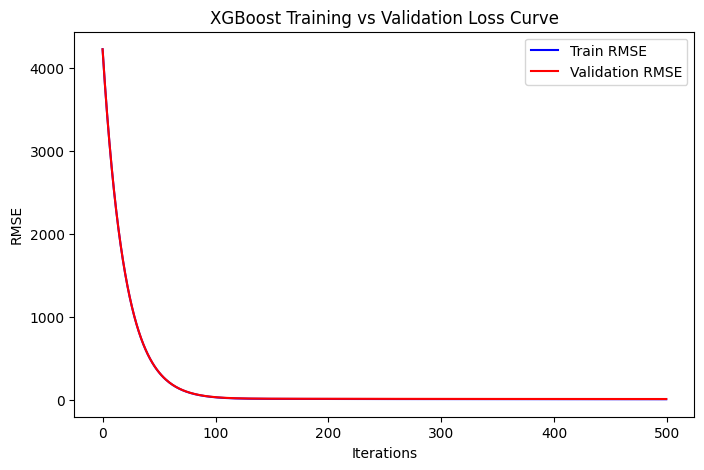

In [70]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Define the model
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, eval_metric="rmse", early_stopping_rounds=10)

# Fit the model with training and validation sets
eval_set = [(X_train_scaled, y_train), (X_val_scaled, y_val)]
xgb_model.fit(X_train_scaled, y_train, eval_set=eval_set, verbose=False)

# Retrieve evaluation results
results = xgb_model.evals_result()

# Plot Training vs Validation Loss (RMSE)
plt.figure(figsize=(8, 5))
plt.plot(results['validation_0']['rmse'], label='Train RMSE', color='blue')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation Loss Curve')
plt.legend()
plt.show()


[22:57:36] WARNING: /croot/xgboost-split_1721080008937/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:4222.34131	validation_1-rmse:4221.92627
[1]	validation_0-rmse:4011.76465	validation_1-rmse:4011.38159
[2]	validation_0-rmse:3811.70752	validation_1-rmse:3811.36279
[3]	validation_0-rmse:3621.61743	validation_1-rmse:3621.47876
[4]	validation_0-rmse:3441.03027	validation_1-rmse:3441.13037
[5]	validation_0-rmse:3269.44751	validation_1-rmse:3269.69727
[6]	validation_0-rmse:3106.42700	validation_1-rmse:3106.80640
[7]	validation_0-rmse:2951.54810	validation_1-rmse:2952.04126
[8]	validation_0-rmse:2804.39697	validation_1-rmse:2805.02661
[9]	validation_0-rmse:2664.58643	

[129]	validation_0-rmse:13.09872	validation_1-rmse:15.13649
[130]	validation_0-rmse:12.89721	validation_1-rmse:14.94548
[131]	validation_0-rmse:12.72218	validation_1-rmse:14.77625
[132]	validation_0-rmse:12.53844	validation_1-rmse:14.60348
[133]	validation_0-rmse:12.37291	validation_1-rmse:14.43599
[134]	validation_0-rmse:12.21936	validation_1-rmse:14.28835
[135]	validation_0-rmse:12.08514	validation_1-rmse:14.15608
[136]	validation_0-rmse:11.96346	validation_1-rmse:14.03671
[137]	validation_0-rmse:11.86438	validation_1-rmse:13.92854
[138]	validation_0-rmse:11.74781	validation_1-rmse:13.81845
[139]	validation_0-rmse:11.63801	validation_1-rmse:13.70977
[140]	validation_0-rmse:11.51273	validation_1-rmse:13.59323
[141]	validation_0-rmse:11.43644	validation_1-rmse:13.51720
[142]	validation_0-rmse:11.36968	validation_1-rmse:13.45241
[143]	validation_0-rmse:11.28735	validation_1-rmse:13.36762
[144]	validation_0-rmse:11.21358	validation_1-rmse:13.29992
[145]	validation_0-rmse:11.14588	validat

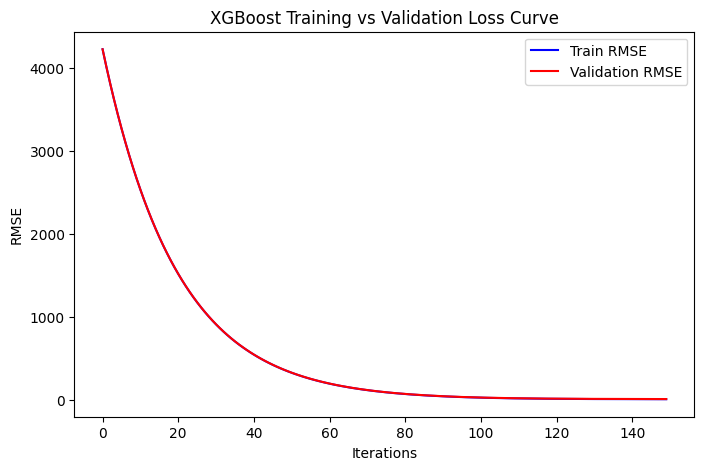

In [71]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Define the model with eval_metric
xgb_model = xgb.XGBRegressor(
    n_estimators=150, 
    learning_rate=0.05, 
    eval_metric="rmse",
    early_stopping_rounds=10
)

# Fit the model with validation set
eval_set = [(X_train_scaled, y_train), (X_val_scaled, y_val)]
xgb_model.fit(
    X_train_scaled, y_train, 
    eval_set=eval_set, 
    early_stopping_rounds=10,  # Ensure it is passed here
    verbose=True  # Show training progress
)

# Retrieve evaluation results
results = xgb_model.evals_result()

# Plot Training vs Validation Loss (RMSE)
plt.figure(figsize=(8, 5))
plt.plot(results['validation_0']['rmse'], label='Train RMSE', color='blue')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation Loss Curve')
plt.legend()
plt.show()


[0]	validation_0-rmse:4219.71777	validation_1-rmse:4229.04883
[1]	validation_0-rmse:4009.27466	validation_1-rmse:4018.29663
[2]	validation_0-rmse:3809.33276	validation_1-rmse:3817.94800
[3]	validation_0-rmse:3619.37451	validation_1-rmse:3627.67529
[4]	validation_0-rmse:3438.91309	validation_1-rmse:3446.91382
[5]	validation_0-rmse:3267.43799	validation_1-rmse:3274.97485
[6]	validation_0-rmse:3104.53003	validation_1-rmse:3111.77979
[7]	validation_0-rmse:2949.74438	validation_1-rmse:2956.69165
[8]	validation_0-rmse:2802.69897	validation_1-rmse:2809.34546
[9]	validation_0-rmse:2662.99219	validation_1-rmse:2669.26294
[10]	validation_0-rmse:2530.24365	validation_1-rmse:2536.24341
[11]	validation_0-rmse:2404.12231	validation_1-rmse:2409.70630
[12]	validation_0-rmse:2284.30298	validation_1-rmse:2289.64746
[13]	validation_0-rmse:2170.44507	validation_1-rmse:2175.56738
[14]	validation_0-rmse:2062.28247	validation_1-rmse:2067.14380
[15]	validation_0-rmse:1959.50794	validation_1-rmse:1964.11829
[1

[135]	validation_0-rmse:12.49344	validation_1-rmse:13.95952
[136]	validation_0-rmse:12.39371	validation_1-rmse:13.86172
[137]	validation_0-rmse:12.26617	validation_1-rmse:13.74097
[138]	validation_0-rmse:12.14532	validation_1-rmse:13.62267
[139]	validation_0-rmse:12.02450	validation_1-rmse:13.50555
[140]	validation_0-rmse:11.94384	validation_1-rmse:13.42930
[141]	validation_0-rmse:11.83065	validation_1-rmse:13.31173
[142]	validation_0-rmse:11.76295	validation_1-rmse:13.24739
[143]	validation_0-rmse:11.65945	validation_1-rmse:13.15230
[144]	validation_0-rmse:11.57105	validation_1-rmse:13.07231
[145]	validation_0-rmse:11.50170	validation_1-rmse:12.99815
[146]	validation_0-rmse:11.43897	validation_1-rmse:12.92896
[147]	validation_0-rmse:11.39513	validation_1-rmse:12.88540
[148]	validation_0-rmse:11.34347	validation_1-rmse:12.83168
[149]	validation_0-rmse:11.28504	validation_1-rmse:12.76827


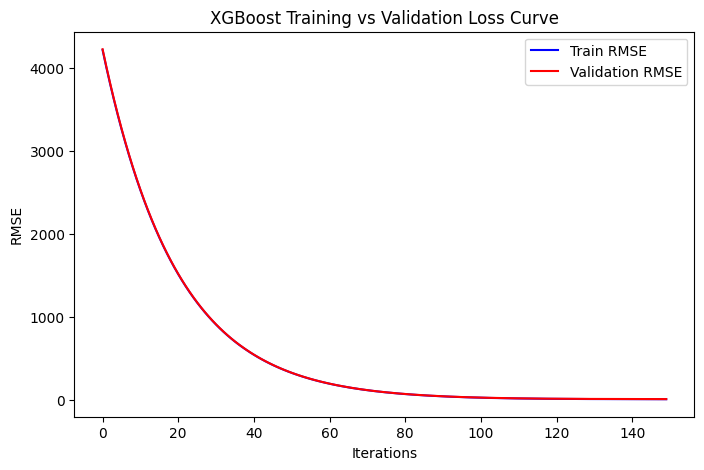

In [72]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# drop null values
df = df.dropna()

# Features
X = df.drop(columns={'ElectricityBill'})

# Target variable
y = df['ElectricityBill']


# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the training set into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and testing data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the model with eval_metric, but not early_stopping_rounds
xgb_model = xgb.XGBRegressor(
    n_estimators=150, 
    learning_rate=0.05, 
    eval_metric="rmse"
)

# Fit the model with validation set and early stopping
eval_set = [(X_train_scaled, y_train), (X_val_scaled, y_val)]
xgb_model.fit(
    X_train_scaled, y_train, 
    eval_set=eval_set, 
    early_stopping_rounds=10,
    verbose=True
)

# Retrieve evaluation results
results = xgb_model.evals_result()

# Plot Training vs Validation Loss (RMSE)
plt.figure(figsize=(8, 5))
plt.plot(results['validation_0']['rmse'], label='Train RMSE', color='blue')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation Loss Curve')
plt.legend()
plt.show()

In [73]:
# import matplotlib.pyplot as plt
# from sklearn.inspection import PartialDependenceDisplay
# import pandas as pd # for handling the data
# import numpy as np # for handling the data
# from xgboost import XGBRegressor # Your XGBoost Model

In [74]:
# # Example: Single Feature PDP
# features_to_plot = ["feature_0", "feature_1", "feature_2"]
# fig, ax = plt.subplots(1,len(features_to_plot), figsize=(15, 5))

# for index, feature_name in enumerate(features_to_plot):
#    PartialDependenceDisplay.from_estimator(
#         best_xgb_model,
#         X_train,
#         [feature_name],
#         ax = ax[index],
#         n_jobs = -1
#    )
# plt.tight_layout()
# plt.show()

Gradient boosting modelling

In [ ]:
# Define the models
models = {
    #'Decision Tree': DecisionTreeRegressor(),
    #'Extra Trees': ExtraTreesRegressor(),
    #'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    #'KNN Regression': KNeighborsRegressor(),
    #'LGBM Regressor': LGBMRegressor(verbose=0),
    #'CatBoost Regressor': CatBoostRegressor(verbose=0),
    #'XGB Regressor': XGBRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(8)

In [ ]:
# Plotting a grouped bar graph
import plotly.express as px
fig = px.bar(results_df, x='Model',
             y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2', 'Training Time (s)', 'Prediction Time (s)'],
             labels={'value': 'Metric Value'}, 
             title='Best Model',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=700,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
             
fig.show()

In [ ]:
# Scater plot

# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Kernel Density Plot
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Kernel density plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True)
    plt.title(f'{model_name} Kernel Density Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats


stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
# Initialize the Random Forest Regressor
rf_model = GradientBoostingRegressor()

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Adjusted R2': [], 'COD': [], 'Training Time (s)': [], 'Prediction Time (s)': []
}

# Measure the training time
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Measure the prediction time
start_time = time.time()
y_pred = rf_model.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Calculate Coefficient of Determination (COD) (it's equivalent to R2 in sklearn)
cod = r2  # COD is the same as R2 in sklearn metrics.

# Calculate Adjusted R2
n = X_test_scaled.shape[0]  # Number of samples
p = X_test_scaled.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Store results in a dictionary
results['Model'].append('Gradient Boosting')
results['MAE'].append(mae)
results['MSE'].append(mse)
results['RMSE'].append(rmse)
results['R2'].append(r2)
results['Adjusted R2'].append(adjusted_r2)
results['COD'].append(cod)
results['MAPE'].append(mape)
results['Training Time (s)'].append(training_time)
results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gradient Boosting Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Gradient Boosting Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [ ]:
# Get Feature Importance
feature_importance =  model.feature_importances_

# Create a DataFrame to view feature importance 
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[:20]

# Plot Horizontal Bar Graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have most important at the top
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression




# Define Objective Function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'max_features': trial.suggest_float('max_features', 0.6, 1.0),  # Replaces colsample_bytree
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 1.0),  # Replaces gamma
        'random_state': 42  # Fixed for reproducibility
    }
    
    # Initialize the GradientBoostingRegressor model
    gbm = GradientBoostingRegressor(**params)

    # Train the model
    gbm.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = gbm.predict(X_test_scaled)

    # Compute MAE (Lower is better)
    mae_test = mean_absolute_error(y_test, y_pred)

    return mae_test

# Run Optuna Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print Best Parameters
print("Best Hyperparameters:", study.best_params)


In [ ]:
best_params = {
    'n_estimators': 89,
    'max_depth': 10,
    'learning_rate': 0.08639172271425251,
    'subsample': 0.7105112602952731,
    'max_features': 0.8581642424862653,
    'min_impurity_decrease': 0.6172722800724966
}

# Initialize the XGBRegressor model with best hyperparameters
# (Assuming XGBRegressor is defined/imported)
from sklearn.ensemble import GradientBoostingRegressor

best_gbm_model = GradientBoostingRegressor(**best_params, random_state=42)

In [ ]:
#best_params = trial.params

# Initialize the XGBRegressor model with best hyperparameters
best_gbm_model = GradientBoostingRegressor(**best_params, random_state=42)

# Fit the model on the entire training data
best_gbm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_gbm_model.predict(X_test_scaled)

# Evaluate the model on the testing data
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)


In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gradient BOOSTING Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Gradient Boosting Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Assume df is already loaded
# Drop null values
df = df.dropna()

# Features and target variable
X = df.drop(columns=['ElectricityBill'])
y = df['ElectricityBill']

# Train-validation-test split (Train: 64%, Val: 16%, Test: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=127)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.55, random_state=127)  # 16% Val, 20% Test

# Feature Scaling (Not strictly required for trees, but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Gradient Boosting Model
gb_model = GradientBoostingRegressor(
    random_state=42
)

# Train the model
start_time = time.time()
gb_model.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Make predictions
y_train_pred = gb_model.predict(X_train_scaled)
y_val_pred = gb_model.predict(X_val_scaled)
y_test_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training Time: {train_time:.2f} seconds")
print(f"Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}, Test R²: {test_r2:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=127)

# Store results
cv_results = {'Fold': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Perform cross-validation
fold = 1
for train_idx, val_idx in kf.split(X, y):
    # Split data
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    # Scale data (optional for Gradient Boosting but improves performance)
    scaler = StandardScaler()
    X_train_cv_scaled = scaler.fit_transform(X_train_cv)
    X_val_cv_scaled = scaler.transform(X_val_cv)

    # Train the model
    gb_model = GradientBoostingRegressor(       
        random_state=42
    )
    gb_model.fit(X_train_cv_scaled, y_train_cv)

    # Predict on validation fold
    y_pred_cv = gb_model.predict(X_val_cv_scaled)

    # Compute evaluation metrics
    mae_cv = mean_absolute_error(y_val_cv, y_pred_cv)
    mse_cv = mean_squared_error(y_val_cv, y_pred_cv)
    rmse_cv = np.sqrt(mse_cv)
    mape_cv = np.mean(np.abs((y_val_cv - y_pred_cv) / y_val_cv)) * 100
    r2_cv = r2_score(y_val_cv, y_pred_cv)

    # Store fold results
    cv_results['Fold'].append(f'Fold {fold}')
    cv_results['MAE'].append(mae_cv)
    cv_results['MSE'].append(mse_cv)
    cv_results['RMSE'].append(rmse_cv)
    cv_results['MAPE'].append(mape_cv)
    cv_results['R2'].append(r2_cv)

    fold += 1

# Create DataFrame with results
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)


In [ ]:
# Predict on test set
y_pred_test = gb_model.predict(X_test_scaled)

# Evaluate model on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
r2_test = r2_score(y_test, y_pred_test)

# Print test set results
print(f"Test Set Results for Gradient Boosting Regressor:")
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%, R2: {r2_test:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the model
gb_model = GradientBoostingRegressor( 
    random_state=42
)

# First, fit the model
gb_model.fit(X_train_scaled, y_train)

# Now, track RMSE at each iteration
train_rmse = []
val_rmse = []

for y_pred_train, y_pred_val in zip(gb_model.staged_predict(X_train_scaled), gb_model.staged_predict(X_val_scaled)):
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Plot Training vs Validation Loss (RMSE)
plt.figure(figsize=(8, 5))
plt.plot(train_rmse, label='Train RMSE', color='blue')
plt.plot(val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Gradient Boosting Training vs Validation Loss Curve')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the Gradient Boosting model
gb_model = GradientBoostingRegressor( 
    random_state=42
)

# Fit the model
gb_model.fit(X_train_scaled, y_train)

# Track RMSE for each boosting iteration
train_rmse = []
val_rmse = []

for y_pred_train, y_pred_val in zip(gb_model.staged_predict(X_train_scaled), gb_model.staged_predict(X_val_scaled)):
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Plot Training vs Validation Loss (RMSE)
plt.figure(figsize=(8, 5))
plt.plot(train_rmse, label='Train RMSE', color='blue')
plt.plot(val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Gradient Boosting Training vs Validation Loss Curve')
plt.legend()
plt.show()
